In [1]:
"""
In this section:
Import requisite libraries and packages for the project
"""
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
"""
In this section:
Set plot and visualization default parameters
"""
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
"""
In this section:
Load the dataset
"""
data = pd.read_csv('./datasets/dataset_NN.csv')

In [4]:
"""
In this section:
Check the dataset structure
"""
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df = pd.DataFrame(data)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
"""
In this section:
Delete two columns; Name and Ticket - in the second and seventh index respectively
These two columns are insignificant to the project as they contain values that cannot be used for classification or prediction
"""
df.drop(df.columns[[2, 7]], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
df.shape

(891, 9)

In [9]:
"""
In this section:
Check for the percentage of missing values in each column
"""
df.isnull().sum()/len(df)*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [10]:
"""
In this section:
Delete the Cabin column that has more than 70% missing values: With more than 70% missing values, an imputation technique
might not correctly work to fill in the most correct values. 
"""
df = pd.DataFrame(df)
for col in df.columns:
       if 'Cabin' in col:
              del df[col]

In [11]:
"""
In this section:
Check to ascertain the remaining columns in the dataset
"""
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
"""
In this section:
Use the LabelEncoder method to encode categorical columns- the encoder assigns a numberical value to each string value
category in the column.
Encode the Sex and Embarked columns and check to see that they are well encoded.
"""
encoder =  LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])
df['Embarked'] = encoder.fit_transform(df['Embarked'])

print(df['Sex'].unique())
print(df['Embarked'].unique())

[1 0]
[2 0 1 3]


In [14]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [15]:
"""
In this section:
Check [again] to determine the percentage of missing values in each column.
A relatively small percentage can be imputed using a suitable imputation method.
"""
df.isnull().sum()/len(df)*100

Survived     0.00000
Pclass       0.00000
Sex          0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
Fare         0.00000
Embarked     0.00000
dtype: float64

In [16]:
"""
In this section:
Define a variable fill_age that calculate the mean age in the Age column
Use the defined variable to fill missing values in the Age column using the fillna method. 
"""
fill_age = df.Age.mean()

df.Age = df.Age.fillna(fill_age)

In [17]:
"""
In this section:
Define a variable fill_embark that evaluates the median in the Embarked column
Use the defined variable to fill missing values in the Embarked column using the fillna method.
The fillna function uses an assinged value to replace Not a Number values in a column
"""
fill_embark = df.Embarked.median()

df.Embarked = df.Embarked.fillna(fill_embark)

In [18]:
"""
In this section:
Check to see if there are any null values in the dataset
the any function returns a boolean value: True implies that there are missing values in a particular column, False implies otherwise.
"""
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [19]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [21]:
"""
In this section:
Make a copy of the refined and preprocessed data.
This might be important if we need an original copy of the data before and after this section.
"""
df_1 = df.copy()

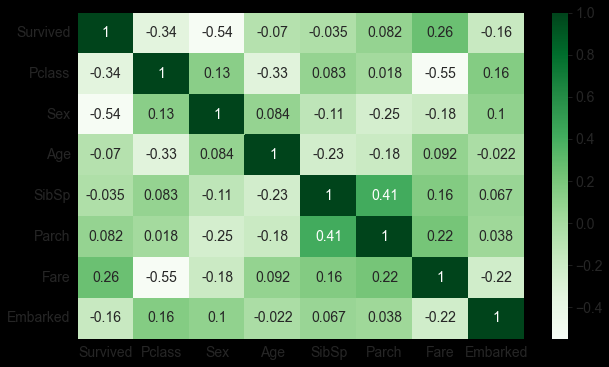

In [22]:
"""
In this section:
Use seaborn's heatmap function to plot a correlation plot for the dataset
This plot will help in determining relations between the different columns.
A value closest to or equal to 1 implies a high positive correlation while a value closest or equal to negative one
implies a negative correlation.
values close to zero imply little or no correlation at all. 

The target feature for the project is to predict for survival chances - hence we check for columns that have a high correlation to the 
Survived column. 
"""
corr_plot = sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [65]:
"""
In this section:
From the correlation plot, we select three most suitable features; this is based on their correlation to the target feature - Survived. 
"""
feature_cols = ['Pclass', 'Sex', 'Fare']

x = df[feature_cols]
y = df['Survived']


Text(0, 0.5, 'Passanger Class')

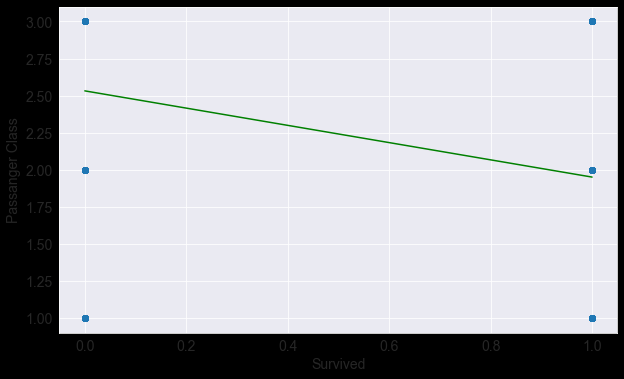

In [103]:
"""
In this section:
Plot and individual scatter plot for the correlation between Survival and Passanger class
The direction of the green line is used to determine a positive or negative correlation.
The gradient of the green line determines how positive or negeative the correlation is. 
A steep bend in the postive direction implies a high positive correlation while a steep bend in the negative direction implies otherwise

Visualized is a slight negative correlation between passenger class and survival.
"""
plt.scatter(df['Survived'], df['Pclass'])
plt.plot(np.unique(df['Survived']), np.poly1d(np.polyfit(df['Survived'], df['Pclass'], 1))(np.unique(df['Survived'])), color='green')
plt.xlabel('Survived')
plt.ylabel('Passanger Class')

Text(0, 0.5, 'Sex')

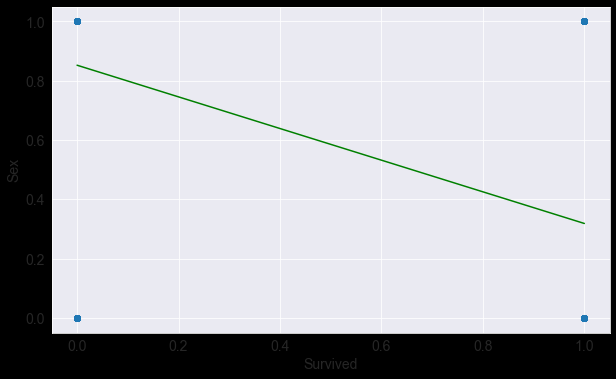

In [104]:
"""
In this section:
Plot and individual scatter plot for the correlation between Survival and sex [gender]
The direction of the green line is used to determine a positive or negative correlation.
The gradient of the green line determines how positive or negeative the correlation is. 
A steep bend in the postive direction implies a high positive correlation while a steep bend in the negative direction implies otherwise

Visualized is a relatively high negative correlation between sex class and survival.
"""
plt.scatter(df['Survived'], df['Sex'])
plt.plot(np.unique(df['Survived']), np.poly1d(np.polyfit(df['Survived'], df['Sex'], 1))(np.unique(df['Survived'])), color='green')
plt.xlabel('Survived')
plt.ylabel('Sex')

Text(0, 0.5, 'Fare')

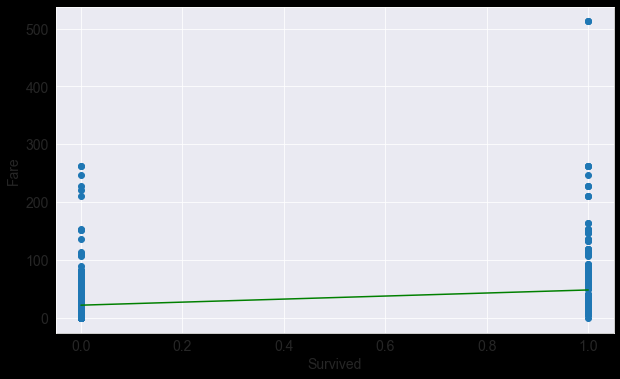

In [105]:
"""
In this section:
Plot and individual scatter plot for the correlation between Survival and Fare
The direction of the green line is used to determine a positive or negative correlation.
The gradient of the green line determines how positive or negeative the correlation is. 
A steep bend in the postive direction implies a high positive correlation while a steep bend in the negative direction implies otherwise

Visualized is a slight positive correlation between fare paid and survival.
"""
plt.scatter(df['Survived'], df['Fare'])
plt.plot(np.unique(df['Survived']), np.poly1d(np.polyfit(df['Survived'], df['Fare'], 1))(np.unique(df['Survived'])), color='green')
plt.xlabel('Survived')
plt.ylabel('Fare')

In [106]:
"""
In this section:
Evaluating for the best value of K using the Elbow Method. 
The Elbow method utilizes inertia residues which are a available in the KMeans clustering algorithm. 

Pass a range of values and return an inertia value for each iteration through the specified range of values.
"""

X = df[feature_cols].values

k_evaluate = []

for k in range(1, 15):
    k_means = KMeans(n_clusters=k)
    
    k_means.fit(X)
    k_evaluate.append(k_means.inertia_)

Text(0, 0.5, 'Inertia')

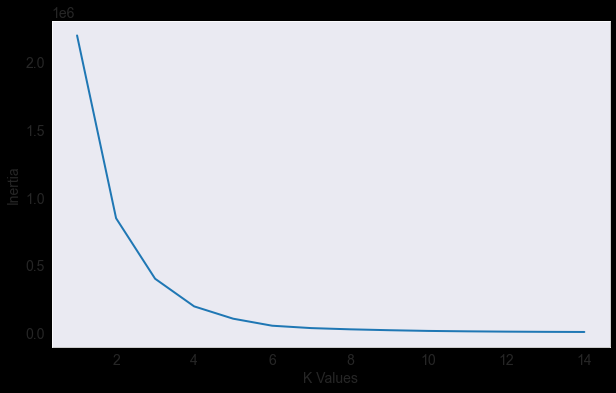

In [107]:
"""
In this section:
.Plot the Inertia against the K values

The Technique to determine the point or range at which the curve forms an elbow shape.
The start point or range for the elbow implies the best values for K

In this case, the Elbow begins at 2 to around 5 - with 5 being the most optimal before the curve flattens. 
values in this range will be used for KNN classifier later on. 
"""
plt.grid()
plt.plot(range(1, 15), k_evaluate, linewidth=2)
plt.xlabel('K Values')
plt.ylabel('Inertia') 

In [68]:
"""
In this section:
split the dataset into training and testing set using 75% of it as training data as 25% as testing data.
"""
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [79]:
"""
In this section:
Define a Euclidean function
The function takes two value classes and for each value in the classes, it evaluates the sum of the squared difference and returns its 
squareroot. 
"""
def euclidean_dist(x_val, y_val):
    distance = 0.0
    
    for i in range(len(x_val)):
        distance += (x_val[i] - y_val[i])**2
        
    return np.sqrt(distance)

In [93]:
"""
In this section:
Define a KNN classifier - using the above defined euclidean distance function as the metric. 
Pass 2 as the number of neighbors. 
fit the model on the training data and make prediction based on the test data

Return the model score using the accuracy_score method
"""
knn = KNeighborsClassifier(metric=euclidean_dist, n_neighbors=2)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print(accuracy_score(y_test, pred))

0.7668161434977578


In [94]:
"""
In this section:
Define a KNN classifier - using the above defined euclidean distance function as the metric. 
Pass 3 as the number of neighbors. 
fit the model on the training data and make prediction based on the test data

Return the model score using the accuracy_score method
"""
knn = KNeighborsClassifier(metric=euclidean_dist, n_neighbors=3)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print(accuracy_score(y_test, pred))

0.7937219730941704


In [96]:
"""
In this section:
Define a KNN classifier - using the above defined euclidean distance function as the metric. 
Pass 5 as the number of neighbors. 
fit the model on the training data and make prediction based on the test data

Return the model score using the accuracy_score method

Comparing the outcomes; the KNN classifier fitted with 5 neighbors score an accuracy of 80.26%
"""
knn = KNeighborsClassifier(metric=euclidean_dist, n_neighbors=5)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print(accuracy_score(y_test, pred))

0.8026905829596412


In [97]:
"""
In this section:
Define a KNN classifier - using the above defined euclidean distance function as the metric. 
Pass 2 as the number of neighbors. 
fit the model on the training data and make prediction based on the test data

Return the model score using the confusion_matrix and classification_report methoods.  
"""
knn = KNeighborsClassifier(metric=euclidean_dist, n_neighbors=2)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[129   6]
 [ 46  42]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       135
           1       0.88      0.48      0.62        88

    accuracy                           0.77       223
   macro avg       0.81      0.72      0.72       223
weighted avg       0.79      0.77      0.75       223



In [98]:
"""
In this section:
Define a KNN classifier - using the above defined euclidean distance function as the metric. 
Pass 3 as the number of neighbors. 
fit the model on the training data and make prediction based on the test data

Return the model score using the confusion_matrix and classification_report methoods.  
"""
knn = KNeighborsClassifier(metric=euclidean_dist, n_neighbors=3)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[122  13]
 [ 33  55]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       135
           1       0.81      0.62      0.71        88

    accuracy                           0.79       223
   macro avg       0.80      0.76      0.77       223
weighted avg       0.80      0.79      0.79       223



In [99]:
"""
In this section:
Define a KNN classifier - using the above defined euclidean distance function as the metric. 
Pass 5 as the number of neighbors. 
fit the model on the training data and make prediction based on the test data

Return the model score using the confusion_matrix and classification_report methoods.  

Compared to the other values of K, a KNN fitted with 5 neighbors returns the highest accuracy [80%]
"""
knn = KNeighborsClassifier(metric=euclidean_dist, n_neighbors=5)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[118  17]
 [ 27  61]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       135
           1       0.78      0.69      0.73        88

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



<AxesSubplot:>

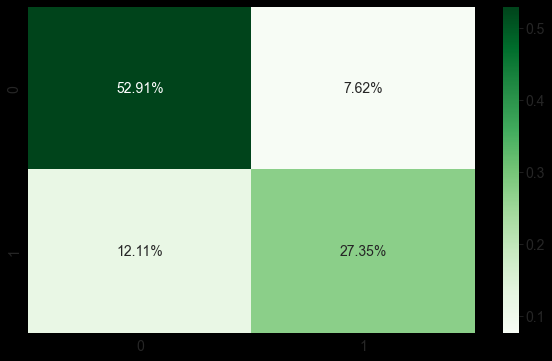

In [100]:
"""
In this section:
A visualization of the confusion matrix  
The confusion matrix plot is a visualization of the True Positives, True Negatives, False Positives, and False Negatives. 

52.91% or values classified as True Positives by the KNN classifier are indeed True Positives
27.35% or values classified as True Negatives by the KNN classifier are indeed True Negatives
Only 12.11% positives are classified as negatives
Onlt 7.62% negatives are classified as positives
"""
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Greens')

In [91]:
"""
In this section:
An evaluation of the error rate of the KNN classifier. 

The error is evaluated by subtracting the score for each value of k from 1 or [100%].   
"""
error_rate = []

for k in range (1, 10):
    
    knn = KNeighborsClassifier(metric=euclidean_dist, n_neighbors=k)
    knn.fit(x_train, y_train)
    
    pred = knn.predict(x_test)
    
    t_error = 1 - accuracy_score(y_test, pred)
    error_rate.append(t_error)

Text(0, 0.5, 'Error Rate')

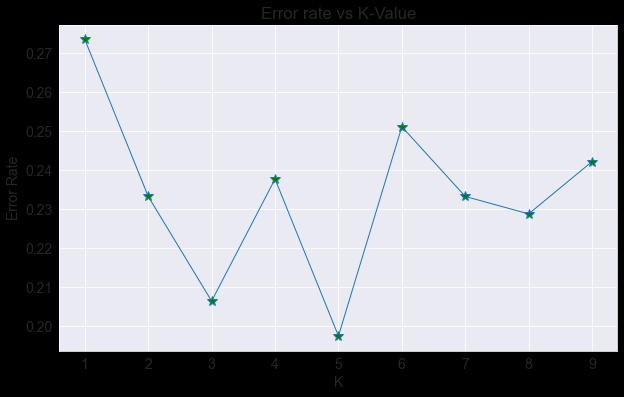

In [92]:
"""
In this section:
A visualization of the error rate plotted against the different values of K

The curve also forms an elbow for values of k = 2 through 5, this is similar to the elbow plot show earlier

As expected, the error is smallest for k=5 [for which the classifier scored the highest accuracy] 
An error rate of ~0.20 at k = 5 implies an accuracy of ~80%

"""
plt.plot(range(1, 10), error_rate, marker='*', linewidth=1, markerfacecolor='green', markersize=10)
plt.title('Error rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### KNN Performance

#### Best value for k
5
#### Best Accuracy Score
80.269%